In [ ]:
import os
changed_dir = False
if not changed_dir:
    os.chdir("..")
    changed_dir=True

In [1]:
# MOVEMENT

import pandas as pd
from pathlib import Path
import sys

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from data.points import ANCHORS, TAG


# filename = "2023-07-04-22:01:13.866234living-room-p1-9.csv"
filename = "data/p4/2023-07-04-23:02:13.565225living-room-p1-17.csv"

# filename = "2023-07-03-14:33:50.217321outdoor-10-10-x5m-y8m.csv"
# filename = "2023-07-03-14:14:07.448520outdoor-10-10.csv"
# filename = "data/simulated/500_500_1000.csv"

REF_POINT = "P4"


class AccelerometerOrientation:
    x_sign: int
    global_x: str
    y_sign: int
    global_y: str

    def __init__(self, setting: str) -> None:
        match setting:
            case "+x":
                data = (1, "acc_z", -1, "acc_y")
            case "-x":
                data = (-1, "acc_z", 1, "acc_y")
            case "+y":
                data = (1, "acc_y", 1, "acc_z")
            case "-y":
                data = (-1, "acc_y", -1, "acc_z")
            case _:
                raise ValueError(setting)

        self.x_sign, self.global_x, self.y_sign, self.global_y = data


######
# Module orientation
# The arrow should point the same way as the back of the module (accelerometer's Z axis)
# <------x-------
#        ^       |
#       -y       |
#                |
#  <+x     -x>   y
#                |
#       +y       |
#        v       v

ACCELEROMETER_ORIENTATION = AccelerometerOrientation("+y")
MULTILATERATION_METHOD = "2d" # if "2d" in sys.argv else "3d"
# MULTILATERATION_METHOD = "3d"
print(f"{MULTILATERATION_METHOD=}")
ACCELEROMETER = True


MULTILATERATION_METHOD='2d'


In [2]:
df = pd.read_csv(filename, index_col=0)
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [3]:
df = df[df.anchor.isin(ANCHORS.keys())]
df = df.set_index("timestamp", drop=False)

anchors = df["anchor"].unique()

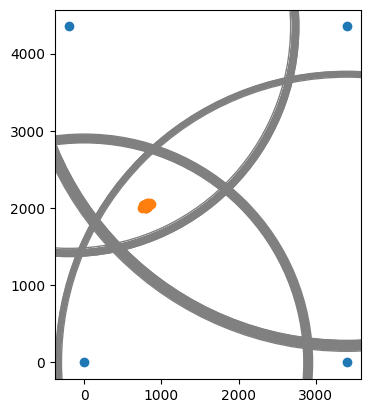

In [4]:
from multilateration.solve import solve

anchors_df = pd.DataFrame(ANCHORS, index=["x", "y"]).transpose()
plt.scatter(anchors_df.x, anchors_df.y)
ax = plt.gca()
for anchor, loc in ANCHORS.items():
    data = df[df["anchor"] == anchor]
    for distance in data["distance"]:
        circle = plt.Circle(loc, distance, fill=False, color="grey")
        ax.add_artist(circle)
ax.set_aspect(1)

df = solve(df, ANCHORS, MULTILATERATION_METHOD)

plt.scatter(df["x"], df["y"])
plt.show()


In [5]:

ref_points_df = pd.DataFrame(TAG, index=["x", "y"]).transpose()

# trace = px.scatter(df, x="x", y="y")
# # anchors = px.scatter(anchors_df, x="x", y="y")
# ref_points = px.scatter(ref_points_df, x="x", y="y")

# # fig = go.Figure(trace.data + anchors.data)
# fig = go.Figure(trace.data + ref_points.data)
# fig.update_xaxes(range=[-200, 4000])
# fig.update_yaxes(range=[-1000, 4600])
# fig.update_layout(width=700, height=700)

# fig.show()

# from datetime import datetime

# tmp = df.copy()
# df["timestamp"] = df["timestamp"].astype(int)
# df["timestamp"] -= df["timestamp"].min()
# fig = px.scatter_3d(
#     df,
#     x="x",
#     y="y",
#     z="z",
#     color="timestamp",
#     color_continuous_scale=px.colors.sequential.Viridis,
# )
# fig.update_scenes(aspectmode="data")
# fig.show()


In [6]:

orig = pd.read_csv(filename, index_col=0)
orig["timestamp"] = pd.to_datetime(orig["timestamp"])
df = orig.merge(df, on="timestamp")
df


,anchor,distance,instant,timestamp,acc_x,acc_y,acc_z,los_confidence,x,y,z,radius
0,0x5836,2932.2983,577202116195,2023-07-04 23:02:13.992131,1.049,-0.134,-0.002,1.0,800.934176,2019.598725,0,542.392243
1,0x5836,2904.2400,610336294565,2023-07-04 23:02:14.511031,1.051,-0.131,-0.003,1.0,761.795620,2041.104090,0,536.325334
2,0x5836,2927.1558,643532706270,2023-07-04 23:02:15.030090,1.051,-0.132,-0.003,1.0,798.641775,2024.023438,0,551.761669
3,0x5836,2932.7434,676689354370,2023-07-04 23:02:15.549462,1.052,-0.129,-0.006,1.0,805.861209,2055.288126,0,553.818184
4,0x5836,2926.1875,709841890606,2023-07-04 23:02:16.068100,1.053,-0.135,-0.002,1.0,802.885750,2030.630598,0,551.649526
...,...,...,...,...,...,...,...,...,...,...,...,...
110,0x5836,2936.5513,932685928510,2023-07-04 23:03:11.178181,1.051,-0.130,-0.008,1.0,819.202652,2040.519759,0,568.736566
111,0x5836,2947.6511,965880157169,2023-07-04 23:03:11.697919,1.051,-0.132,-0.005,1.0,803.982435,2033.384702,0,556.342255
112,0x5836,2924.3997,999114636874,2023-07-04 23:03:12.218368,1.051,-0.131,-0.009,1.0,788.010639,2012.799930,0,539.095200
113,0x5836,2933.5034,1032348944031,2023-07-04 23:03:12.737910,1.055,-0.134,-0.006,1.0,811.144867,2039.470526,0,572.709954


In [7]:
df = df[
    [
        "timestamp",
        "acc_x",
        "acc_y",
        "acc_z",
        "x",
        "y",
        "radius",
        # "reference_distance",
    ]
]


In [8]:
df

,timestamp,acc_x,acc_y,acc_z,x,y,radius
0,2023-07-04 23:02:13.992131,1.049,-0.134,-0.002,800.934176,2019.598725,542.392243
1,2023-07-04 23:02:14.511031,1.051,-0.131,-0.003,761.795620,2041.104090,536.325334
2,2023-07-04 23:02:15.030090,1.051,-0.132,-0.003,798.641775,2024.023438,551.761669
3,2023-07-04 23:02:15.549462,1.052,-0.129,-0.006,805.861209,2055.288126,553.818184
4,2023-07-04 23:02:16.068100,1.053,-0.135,-0.002,802.885750,2030.630598,551.649526
...,...,...,...,...,...,...,...
110,2023-07-04 23:03:11.178181,1.051,-0.130,-0.008,819.202652,2040.519759,568.736566
111,2023-07-04 23:03:11.697919,1.051,-0.132,-0.005,803.982435,2033.384702,556.342255
112,2023-07-04 23:03:12.218368,1.051,-0.131,-0.009,788.010639,2012.799930,539.095200
113,2023-07-04 23:03:12.737910,1.055,-0.134,-0.006,811.144867,2039.470526,572.709954


In [9]:

# KALMAN

# Units conversion - m and m/s^2
df[["x", "y"]] /= 1000
df[["acc_x", "acc_y", "acc_z"]] *= 9.80665
# df["reference_distance"] /= 1000

import numpy as np

dt = df["timestamp"].diff().mean().to_pytimedelta().microseconds / 10**6

F = np.matrix(
    [[1, 0, dt**2 / 2, 0], [0, 1, 0, dt**2 / 2], [0, 0, 1, 0], [0, 0, 0, 1]]
)
H = np.matrix(np.eye(4))

Q = np.matrix(np.diag([0.01, 0.01, 0.01, 0.01]))
# Q = np.matrix(np.diag([0.01, 0.01, 1000, 1000]))
R = np.matrix(
    np.diag(
        [
            df["x"].std() ** 2,
            df["y"].std() ** 2,
            df[ACCELEROMETER_ORIENTATION.global_x].std() ** 2,
            df[ACCELEROMETER_ORIENTATION.global_y].std() ** 2,
        ]
    )
)
# print(
#     f"""{[
#             df["x"].std(),
#             df["y"].std(),
#             df[ACCELEROMETER_ORIENTATION.global_x].std(),
#             df[ACCELEROMETER_ORIENTATION.global_y].std(),
#         ]}"""
# )
P = np.matrix(np.eye(4)) * 100
x = np.matrix("0. 0. 0. 0.").T



/tmp/ipykernel_17155/4017975226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["x", "y"]] /= 1000
/tmp/ipykernel_17155/4017975226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["acc_x", "acc_y", "acc_z"]] *= 9.80665


In [10]:

def kalman_step(x, P, measurement, R, motion, Q, F, H):
    # PREDICT x, P based on motion
    x = F * x + motion
    P = F * P * F.T + Q

    # UPDATE x, P based on measurement m
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I  # Kalman gain
    x = x + K * y
    I = np.matrix(np.eye(F.shape[0]))  # identity matrix
    P = (I - K * H) * P

    return x, P


In [11]:


# Delete gravity
df[["acc_x", "acc_y", "acc_z"]] -= df[["acc_x", "acc_y", "acc_z"]].head(3).mean()
data = df

filtered = []
motion = np.matrix("0. 0. 0. 0.").T
for _, measurement in data[
    [
        "x",
        "y",
        ACCELEROMETER_ORIENTATION.global_x,
        ACCELEROMETER_ORIENTATION.global_y,
    ]
].iterrows():
    measurement = measurement.to_list()
    measurement = [
        measurement[0],  # x
        measurement[1],  # y
        ACCELEROMETER_ORIENTATION.x_sign * measurement[2],  # x
        ACCELEROMETER_ORIENTATION.y_sign * measurement[3],  # y
    ]
    x, P = kalman_step(x, P, measurement, R, motion, Q, F, H)
    filtered.append(x.tolist())

filtered_pos = [[x[0], y[0]] for (x, y, _, _) in filtered]
filtered_acc = [[x[0], y[0]] for (_, _, x, y) in filtered]


/tmp/ipykernel_17155/24457427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["acc_x", "acc_y", "acc_z"]] -= df[["acc_x", "acc_y", "acc_z"]].head(3).mean()


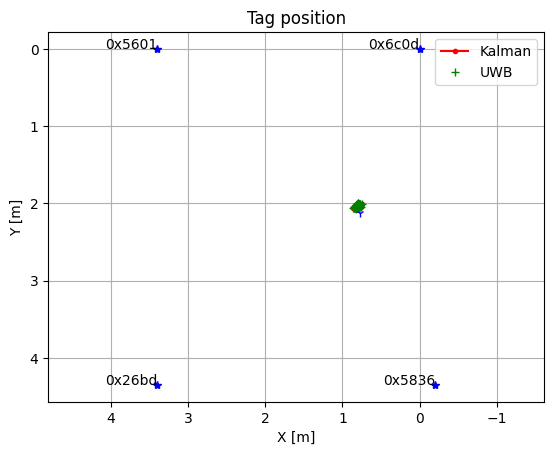

In [12]:

from data.points import TAG
from data.points import ANCHORS

a_x, a_y = zip(*ANCHORS.values())
a_x = [v / 1000 for v in a_x]
a_y = [v / 1000 for v in a_y]
a_labels = ANCHORS.keys()


x, y = zip(*filtered_pos)

plt.plot(x, y, "r.-")  # Kalman
plt.plot((df.x).to_list(), (df.y).to_list(), "g+")  # UWB


plt.plot(a_x, a_y, "b*")
ax = plt.gca()
for x, y, label in zip(a_x, a_y, a_labels):
    ax.annotate(label, (x, y), horizontalalignment="right")

# plt.axhline(TAG["P1"][1] / 1000)
plt.plot(TAG[REF_POINT][0] / 1000, TAG[REF_POINT][1] / 1000, "b1")

plt.axis("equal")
plt.legend(["Kalman", "UWB"])
plt.title("Tag position")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.grid(True, "both")

ax.invert_xaxis()
ax.invert_yaxis()
plt.show()


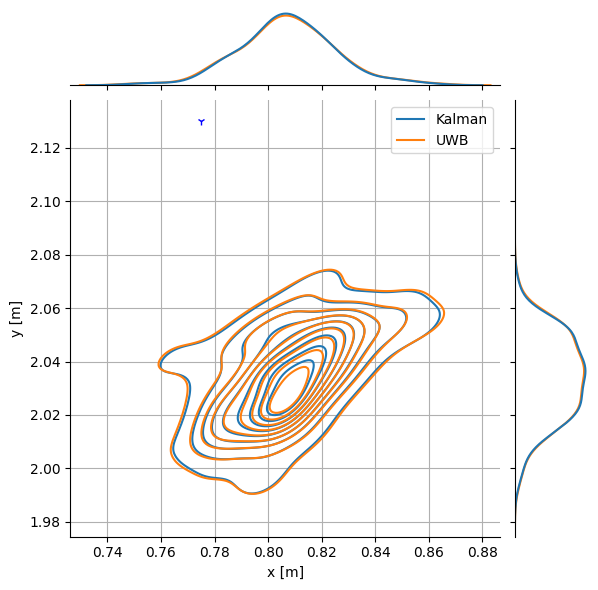

In [13]:


###############

# from scipy.stats import norm
# import statistics

x, y = zip(*filtered_pos)

import seaborn as sns


# Remove outliers
def remove_outliers(df: pd.DataFrame):
    df = df[df.quantile(0.05) < df]
    # df = df[df < df.quantile(0.97)]
    return df


tmp_df = pd.DataFrame({"x": x, "y": y, "source": "Kalman"})
# tmp_df.x = remove_outliers(tmp_df.x)
# tmp_df.y = remove_outliers(tmp_df.y)
tmp2_df = df[["x", "y"]].copy()
# tmp2_df.x = remove_outliers(tmp2_df.x)
# tmp2_df.y = remove_outliers(tmp2_df.y)
tmp2_df["source"] = "UWB"
tmp_df = pd.concat([tmp_df, tmp2_df]).dropna()

# print(tmp_df)
sns.jointplot(
    data=tmp_df,
    x="x",
    y="y",
    hue="source",
    kind="kde",
    # bw_adjust=0.9,
)
# plt.title("Bivariate distribution of positioning results.")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.plot(TAG[REF_POINT][0] / 1000, TAG[REF_POINT][1] / 1000, "b1")
ax = plt.gca()
ax.get_legend().set_title("")
plt.grid()
plt.show()


In [14]:

from math import sqrt

# Distance between the line and trajectory
# ax + by + c = 0

a = 0
b = 1
# c = -1.560
# c = -2.3
c = -TAG[REF_POINT][1] / 1000


def point_line_distance(x, y, a, b, c):
    return abs(a * x + b * y + c) / sqrt(a**2 + b**2)


def p2p_dist(ax, ay, bx, by):
    return sqrt((bx - ax) ** 2 + (by - ay) ** 2)


# calc_dist = lambda x: point_line_distance(x[0], x[1], a, b, c)
calc_dist = lambda x: p2p_dist(x[0], x[1], TAG[REF_POINT][0] / 1000, TAG[REF_POINT][1] / 1000)
# calc_dist = lambda x: p2p_dist(x[0], x[1], 1.5, 1.5)
# calc_dist = lambda x: p2p_dist(x[0], x[1], x[2], x[3])

kalman_df = pd.DataFrame(
    {
        "x": [v for v, _ in filtered_pos],
        "y": [v for _, v in filtered_pos],
    }
)
kalman_df["error"] = kalman_df.apply(calc_dist, axis=1)

df["error"] = df[
    [
        "x",
        "y",
    ]
].apply(calc_dist, axis=1)


/tmp/ipykernel_17155/2208545925.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["error"] = df[


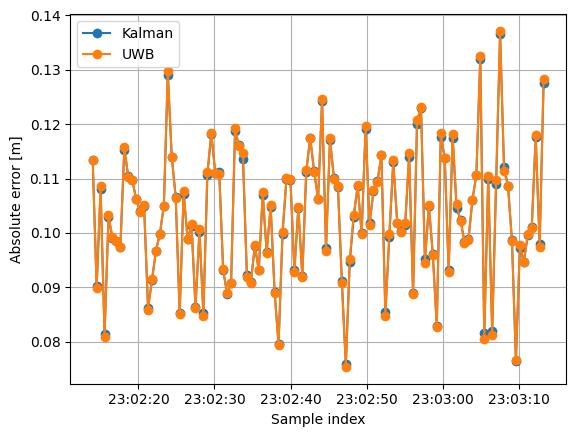

In [15]:

errors = pd.concat(
    [kalman_df["error"], df["error"]],
    axis=1,
    keys=["Kalman (UWB+accelerometer)", "UWB"],
)

plt.cla()
plt.plot(df["timestamp"], kalman_df["error"], "-o", label="Kalman")
plt.plot(df["timestamp"], df["error"], "-o", label="UWB")
plt.legend()
plt.ylabel("Absolute error [m]")
plt.xlabel("Sample index")
plt.grid(True)
plt.show()

In [16]:

rmse = np.sqrt(errors.apply(lambda x: x**2, axis=1).mean())
print(f"RMSE:\n{rmse}")


RMSE:
Kalman (UWB+accelerometer)    0.103879
UWB                           0.103975
dtype: float64
